# Seattle Weather Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, mean_absolute_error, mean_squared_error, r2_score

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\WEATHER PREDICTION\seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
df.shape

(1461, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
date             1461 non-null object
precipitation    1461 non-null float64
temp_max         1461 non-null float64
temp_min         1461 non-null float64
wind             1461 non-null float64
weather          1461 non-null object
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
round(df.describe(), 2)

,precipitation,temp_max,temp_min,wind
count,1461.00,1461.00,1461.00,1461.00
mean,3.03,16.44,8.23,3.24
std,6.68,7.35,5.02,1.44
min,0.00,-1.60,-7.10,0.40
25%,0.00,10.60,4.40,2.20
50%,0.00,15.60,8.30,3.00
75%,2.80,22.20,12.20,4.00
max,55.90,35.60,18.30,9.50


In [6]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Text(0.5, 1, 'Pearsons Correlation of columns')

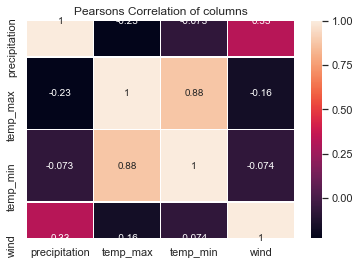

In [8]:
plt.figure(figsize=(6, 4))
sb.heatmap(df.corr(), annot = True, linewidths=0.5)
plt.title('Pearsons Correlation of columns')

Text(0.5, 1.0, 'Distribution Plot for Precipitation Series')

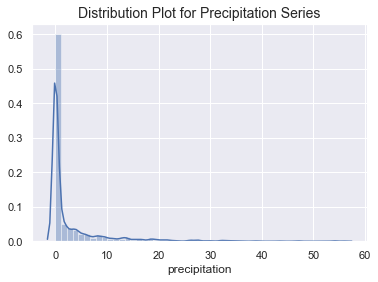

In [9]:
sb.distplot(df['precipitation'])
plt.title('Distribution Plot for Precipitation Series', fontdict = {'size':14})

Text(0.5, 1.0, 'Distribution Plot for Maximum \nTemperatture Series')

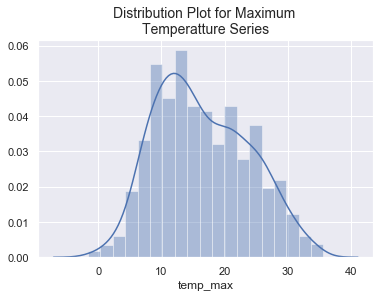

In [10]:
sb.distplot(df['temp_max'])
plt.title('Distribution Plot for Maximum \nTemperatture Series', fontdict = {'size':14})

Text(0.5, 1.0, 'Distribution Plot for Minimum \nTemperature Series')

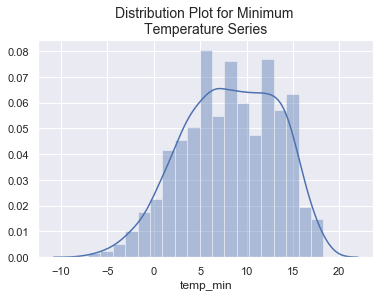

In [11]:
sb.distplot(df['temp_min'])
plt.title('Distribution Plot for Minimum \nTemperature Series', fontdict = {'size':14})

Text(0.5, 1.0, 'Distribution Plot for Wind Series')

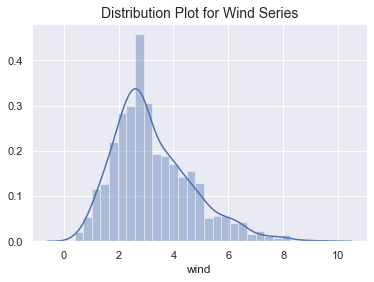

In [12]:
sb.distplot(df['wind'])
plt.title('Distribution Plot for Wind Series', fontdict = {'size':14})

In [13]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text yticklabel objects>)

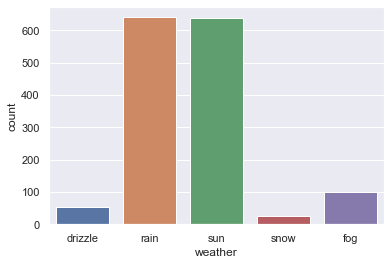

In [14]:
sb.countplot(df['weather'])
plt.yticks(None)

In [15]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [16]:
df['weekday'] = df['date'].dt.day_name()

In [17]:
df['month'] = df['date'].dt.month_name()

In [18]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January


Text(0.5, 1.0, 'Seattle Monthly Weather Report')

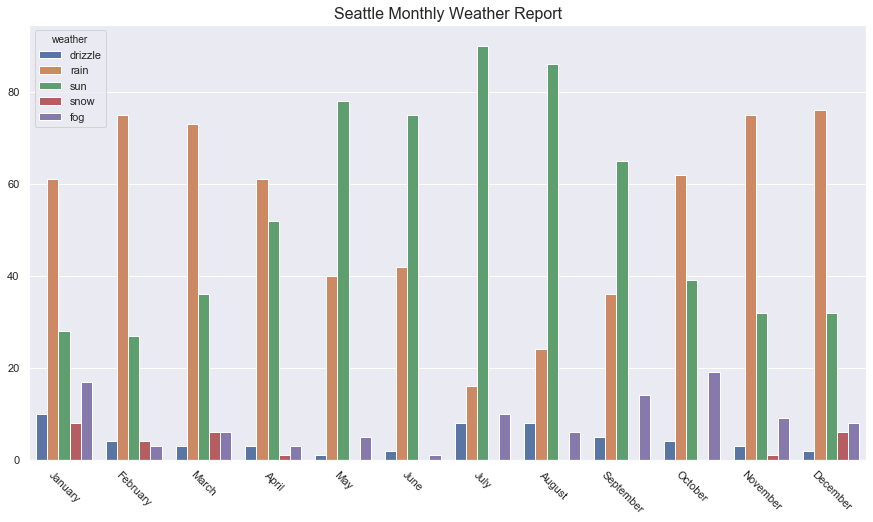

In [19]:
plt.figure(figsize = (15, 8))
sb.countplot(x = df['month'], hue = df['weather'])
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = -45)
plt.title('Seattle Monthly Weather Report', fontdict = {'size':16})

Text(0.5, 1.0, 'Seattle Weekday Weather Report')

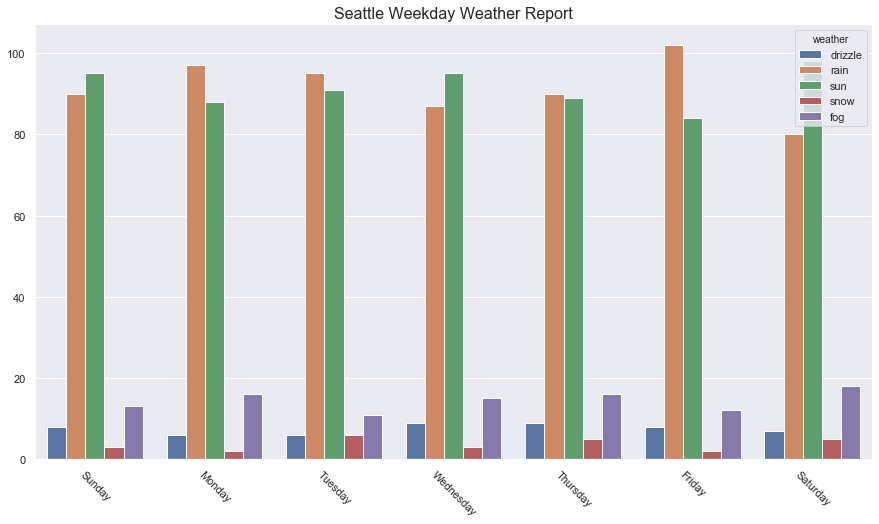

In [20]:
plt.figure(figsize = (15, 8))
sb.countplot(x = df['weekday'], hue = df['weather'])
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(rotation = -45)
plt.title('Seattle Weekday Weather Report', fontdict = {'size':16})

### Feature Engineering

In [21]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January


In [22]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,January
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,January
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,January
3,2012-01-04,20.3,12.2,5.6,4.7,rain,Wednesday,January
4,2012-01-05,1.3,8.9,2.8,6.1,rain,Thursday,January


In [23]:
df2 = df.drop(columns = ['weekday', 'month', 'date'])
df2.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [24]:
x = df2.drop(columns = ['weather'])
y = df2['weather']

def categoricals(data):
    cat_cols = (data.dtypes == 'object')
    categories = list(cat_cols[cat_cols].index)
    le = LabelEncoder()
    for i in categories:
        data[i] = le.fit_transform(data[i])
        
categoricals(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print('x train', x_train.shape)
print('y test', y_test.shape)
print('x train', x_train.shape)
print('y test', y_test.shape)

x train (1168, 4)
y test (293,)
x train (1168, 4)
y test (293,)


In [25]:
def run_experiment(model):
    
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    print('')
    print('Classification Metrics of \n', str(model))
    print('F1 Score', f1_score(y_test, pred, pos_label='positive', average='micro'))
    print('Precision', precision_score(y_test, pred, pos_label='positive', average='micro'))
    print('Recall', recall_score(y_test, pred, pos_label='positive', average='micro'))

In [26]:
dtc = DecisionTreeClassifier()
svc = SVC()
rfc = RandomForestClassifier()

models = {
    dtc : DecisionTreeClassifier(),
    svc : SVC(),
    rfc : RandomForestClassifier()
}

for i in models.keys():
    run_experiment(i)


Classification Metrics of 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
F1 Score 0.7508532423208191
Precision 0.7508532423208191
Recall 0.7508532423208191

Classification Metrics of 
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
F1 Score 0.8020477815699659
Precision 0.8020477815699659
Recall 0.8020477815699659

Classification Metrics of 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       m

In [27]:
def manual_testing(model, data):
    
    input_data = data
    
    input_data_to_array = np.asarray(input_data)
    
    reshape_input_data_to_array = input_data_to_array.reshape(1, -1)
    
    model.fit(x_train, y_train)
    
    pred = model.predict(reshape_input_data_to_array)
    
    print(pred)

In [28]:
manual_testing(dtc, [0.0, 23.3, 12.2, 1.9])

['fog']


In [29]:
df2.drop(columns = 'weather').sample(4)
df.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month
103,2012-04-13,0.0,15.0,3.9,4.0,drizzle,Friday,April
172,2012-06-21,0.0,23.9,11.7,2.1,sun,Thursday,June
1118,2015-01-23,5.8,12.2,8.3,2.6,rain,Friday,January
459,2013-04-04,8.4,14.4,10.0,3.0,rain,Thursday,April
1018,2014-10-15,8.6,16.1,11.7,4.7,rain,Wednesday,October


Text(0.5, 1.0, 'Regression Plot for Wind against \nTemperature')

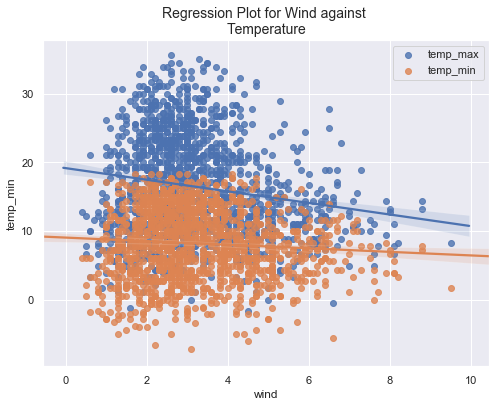

In [30]:
plt.figure(figsize = (8,6))
sb.regplot(x = df2['wind'], y = df2['temp_max'], label= 'temp_max')
sb.regplot(x = df2['wind'], y = df2['temp_min'], label = 'temp_min')
plt.legend(loc = 'best')
plt.title('Regression Plot for Wind against \nTemperature', fontdict={'size':14})